<a href="https://colab.research.google.com/github/NMT20104010/BTVN/blob/main/Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Data/Rice


/content/drive/MyDrive/Data/Rice


In [ ]:
ls

test/  train/


In [ ]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
rice_train = train_datagen.flow_from_directory(
    './train/',
    target_size= (250, 250),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


rice_test = test_data.flow_from_directory(
    './test/', 
    target_size= (250, 250), 
    batch_size = 16,
    class_mode = 'categorical')

Found 759 images belonging to 5 classes.
Found 422 images belonging to 5 classes.


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(250,250,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 128)     

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(rice_train, epochs=10, batch_size=128)

Epoch 1/10
48/48 [==============================] - 110s 2s/step - loss: 0.8348 - accuracy: 0.7602
Epoch 2/10
48/48 [==============================] - 94s 2s/step - loss: 0.1159 - accuracy: 0.9578
Epoch 3/10
48/48 [==============================] - 94s 2s/step - loss: 0.0826 - accuracy: 0.9671
Epoch 4/10
48/48 [==============================] - 98s 2s/step - loss: 0.0574 - accuracy: 0.9895
Epoch 5/10
48/48 [==============================] - 97s 2s/step - loss: 0.0219 - accuracy: 0.9934
Epoch 6/10
48/48 [==============================] - 99s 2s/step - loss: 0.0358 - accuracy: 0.9868
Epoch 7/10
48/48 [==============================] - 99s 2s/step - loss: 0.0153 - accuracy: 0.9960
Epoch 8/10
48/48 [==============================] - 99s 2s/step - loss: 0.0309 - accuracy: 0.9934
Epoch 9/10
48/48 [==============================] - 99s 2s/step - loss: 7.5786e-05 - accuracy: 1.0000
Epoch 10/10
48/48 [==============================] - 95s 2s/step - loss: 0.0273 - accuracy: 0.9921


In [ ]:
model.save('Rice.h5')


In [ ]:
from keras.models import load_model
model_flower=load_model('Rice.h5')

1/1 [==============================] - 0s 301ms/step
Đây là : Ipsala


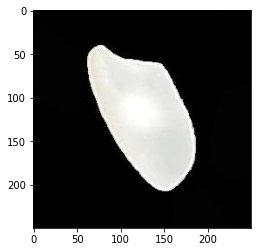

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/Ipsala (14233).jpg',target_size = (250,250))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['Arborio','Basmati','Ipsala','Jamine','Karacadag']
r= int(np.argmax(result,axis=1))
print("Đây là :", class_name[r])

In [ ]:
!jupyter nbconvert --to html "/content/Rice.ipynb"

[NbConvertApp] Converting notebook /content/Rice.ipynb to html
[NbConvertApp] Writing 317863 bytes to /content/Rice.html
